In [1]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from sklearn.metrics import accuracy_score

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.

!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.1 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# load dataset hasil scrapping

import pandas as pd

scrap_df = pd.read_csv('/content/reviews_gojek.csv')
scrap_df.head()


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,kota
0,8d691c7b-b883-4f57-a933-dfc7924ac15f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mantab,5,0,5.9.1,2025-02-11 09:02:08,NaN,NaN,5.9.1,Medan
1,2626fd84-e34c-41fd-90c8-1690dc0129b5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Harga onkirnya gak ngotak, aku mau beli makana...",1,1,5.9.1,2025-02-11 09:00:02,"Mohon maaf atas ketidaknyamanannya, Kak Kadja....",2025-02-11 09:38:01,5.9.1,Medan
2,4a47892d-ba6a-44c7-a763-0f22ee4e43b5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,baguss,5,0,5.9.1,2025-02-11 08:55:02,NaN,NaN,5.9.1,Kisaran
3,59be8ce4-5b29-44ca-b19a-47b3e344fcc9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Pelayanan gojek semakin buruk banget dan mahal...,1,0,NaN,2025-02-11 08:20:50,"Mohon maaf atas ketidaknyamanannya, Kak Saman....",2025-02-11 08:52:48,NaN,Medan
4,27528625-e7e2-43ee-9b02-747a9c4c29e4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ini klo ada rating lebih buruk dari b1 akan gw...,1,0,NaN,2025-02-11 08:12:46,"Hai Kak @Gamers Studio, mohon maaf atas ketida...",2025-02-11 08:55:00,NaN,Kisaran


In [5]:
scrap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              30000 non-null  object
 1   userName              30000 non-null  object
 2   userImage             30000 non-null  object
 3   content               30000 non-null  object
 4   score                 30000 non-null  int64 
 5   thumbsUpCount         30000 non-null  int64 
 6   reviewCreatedVersion  23108 non-null  object
 7   at                    30000 non-null  object
 8   replyContent          8806 non-null   object
 9   repliedAt             8806 non-null   object
 10  appVersion            23108 non-null  object
 11  kota                  30000 non-null  object
dtypes: int64(2), object(10)
memory usage: 2.7+ MB


In [6]:
clean_df = scrap_df.dropna()

In [7]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6593 entries, 1 to 29983
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              6593 non-null   object
 1   userName              6593 non-null   object
 2   userImage             6593 non-null   object
 3   content               6593 non-null   object
 4   score                 6593 non-null   int64 
 5   thumbsUpCount         6593 non-null   int64 
 6   reviewCreatedVersion  6593 non-null   object
 7   at                    6593 non-null   object
 8   replyContent          6593 non-null   object
 9   repliedAt             6593 non-null   object
 10  appVersion            6593 non-null   object
 11  kota                  6593 non-null   object
dtypes: int64(2), object(10)
memory usage: 669.6+ KB


In [8]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [9]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [10]:
print(nltk.data.path)

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [11]:
!pip install spacy

In [12]:
import spacy

# Load model bahasa Inggris
nlp = spacy.load("en_core_web_sm")

def tokenizingText(text):
    doc = nlp(text)
    return [token.text for token in doc]

In [13]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [14]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,kota,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
1,2626fd84-e34c-41fd-90c8-1690dc0129b5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Harga onkirnya gak ngotak, aku mau beli makana...",1,1,5.9.1,2025-02-11 09:00:02,"Mohon maaf atas ketidaknyamanannya, Kak Kadja....",2025-02-11 09:38:01,5.9.1,Medan,Harga onkirnya gak ngotak aku mau beli makanan...,harga onkirnya gak ngotak aku mau beli makanan...,harga onkirnya gak ngotak aku mau beli makanan...,"[harga, onkirnya, gak, ngotak, aku, mau, beli,...","[harga, onkirnya, ngotak, beli, makanan, mudah...",harga onkirnya ngotak beli makanan mudah mahal...
7,01cad4b8-95c4-4630-bb70-994769fee504,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Driver minta cancel karna titik jemput jauh on...,1,0,4.84.1,2025-02-11 07:46:28,"Hai Kak Hesti, mohon maaf atas ketidaknyamanan...",2025-02-11 08:47:18,4.84.1,Binjai,Driver minta cancel karna titik jemput jauh on...,driver minta cancel karna titik jemput jauh on...,driver minta cancel karna titik jemput jauh on...,"[driver, minta, cancel, karna, titik, jemput, ...","[driver, cancel, karna, titik, jemput, ongkos,...",driver cancel karna titik jemput ongkos murah
8,5488ebde-7210-4fec-b80f-1136078fe32c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Kalau ketentuan untuk semua Gocar, bisa ditera...",2,0,5.10.1,2025-02-11 07:40:48,"Hai Kak Jerry, mohon maaf atas ketidaknyamanan...",2025-02-11 08:42:20,5.10.1,Medan,Kalau ketentuan untuk semua Gocar bisa diterap...,kalau ketentuan untuk semua gocar bisa diterap...,kalau ketentuan untuk semua gocar bisa diterap...,"[kalau, ketentuan, untuk, semua, gocar, bisa, ...","[ketentuan, gocar, diterapkan, kyk, peraturan,...",ketentuan gocar diterapkan kyk peraturan blueb...
13,33ba7c41-307b-43c8-b3b3-2f12aa420c6f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sekara apakah GOSEND tidak bisa tunai ya? kala...,1,4,5.9.1,2025-02-11 07:29:09,"Hai Kak @Nyambek Kaze, mohon maaf atas ketidak...",2025-02-11 08:45:41,5.9.1,Pematang Siantar,sekara apakah GOSEND tidak bisa tunai ya kalau...,sekara apakah gosend tidak bisa tunai ya kalau...,sekara apakah gosend tidak bisa tunai ya kalau...,"[sekara, apakah, gosend, tidak, bisa, tunai, y...","[sekara, gosend, tunai, emang, bug, tolong, di...",sekara gosend tunai emang bug tolong diperbaik...
14,fc6ddb12-3bbb-49d4-9d6e-2eeb6cf82e43,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi bikin emosi,,, dah tau gua mau edit a...",1,0,5.9.1,2025-02-11 07:17:25,"Hai Kak Haris, mohon maaf atas ketidaknyamanan...",2025-02-11 08:39:50,5.9.1,Binjai,Aplikasi bikin emosi dah tau gua mau edit alam...,aplikasi bikin emosi dah tau gua mau edit alam...,aplikasi bikin emosi dah tau gua mau edit alam...,"[aplikasi, bikin, emosi, dah, tau, gua, mau, e...","[aplikasi, bikin, emosi, dah, tau, gua, edit, ...",aplikasi bikin emosi dah tau gua edit alamat p...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29944,acc405a0-8620-4712-835a-2f8778c5d104,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Drivernya gak niat kerja...2 kali batal gak ma...,1,0,4.89.1,2024-09-10 11:23:14,"Hai Kak Ginanjar, mohon maaf atas ketidaknyama...",2024-09-10 14:08:16,4.89.1,Tebing Tinggi,Drivernya gak niat kerja kali batal gak mau ng...,drivernya gak niat kerja kali batal gak mau ng...,drivernya gak niat kerja kali batal gak mau ng...,"[drivernya, gak, niat, kerja, kali, batal, gak...","[drivernya, niat, kerja, kali, batal, nganteri...",drivernya niat kerja kali batal nganterin teru...
29951,5ec454ef-04ac-4f8b-bd9c-704266da7050,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Lokasi driver selalu dapat yang jauh jauh,1,0,4.93.1,2024-09-10 10:56:23,"Hai Kak Dani, mohon maaf atas ketidaknyamanann...",2024

In [15]:
import csv
import requests
from io import StringIO

# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")



In [18]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif


    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    3990
positive    2603
Name: count, dtype: int64


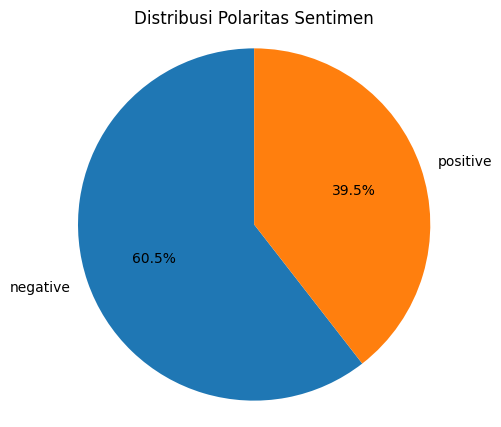

In [19]:
# prompt: bagaimana menampilkan diagram pie untuk hasil result clean df

import matplotlib.pyplot as plt

# Menghitung jumlah setiap kategori polaritas
polarity_counts = clean_df['polarity'].value_counts()

# Membuat diagram pie
plt.figure(figsize=(5, 5))  # Mengatur ukuran gambar
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Polaritas Sentimen')
plt.axis('equal')  # Memastikan lingkaran pie berbentuk lingkaran
plt.show()


In [22]:
from sklearn.model_selection import train_test_split # Import the correct module

# ... your other code ...

# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=1000, min_df=15, max_df=0.85 )
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42) # Call the correct function

In [23]:

from sklearn.svm import SVC  # Import Support Vector Classifier
from sklearn.metrics import accuracy_score

# Inisialisasi model SVM
svm = SVC(kernel='linear', random_state=42)

# Latih model dengan data training
svm.fit(X_train, y_train)

# Akurasi pada data latih
y_pred_train_svm = svm.predict(X_train)
accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm) * 100  # Ubah ke persen

# Akurasi pada data uji
y_pred_test_svm = svm.predict(X_test)
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm) * 100  # Ubah ke persen

# Cetak hasil dengan format persentase
print(f"Akurasi SVM pada data train: {accuracy_train_svm:.2f}%")
print(f"Akurasi SVM pada data test: {accuracy_test_svm:.2f}%")


Akurasi SVM pada data train: 91.30%
Akurasi SVM pada data test: 87.26%


In [24]:
!pip freeze > requirements.txt